<a href="https://colab.research.google.com/github/suyog568/myfiles/blob/main/Worksheet_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Suyog Bastakoti**

**University Id: 2407093**

**Module: Concepts & Technologies of AI**

#Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [39]:
# Load the uploaded CSV file
file_path = '/content/drive/MyDrive/Data Set /diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and summary information for EDA
data_head = data.head()
data_info = data.info()
data_summary = data.describe()

data_head, data_info, data_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.627   50        1  
 1                     0.351   31        0  
 2                     0.672   32        1  
 3                     0.167   21        0  
 4                     2.288   33        1  ,
 None,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807     

#2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [40]:
# Replace zeros in specific columns with NaN to handle missing/erroneous data
columns_with_potential_issues = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_potential_issues] = data[columns_with_potential_issues].replace(0, pd.NA)

# Check for missing values after replacement
missing_values_summary = data.isnull().sum()

missing_values_summary


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [41]:
# Impute missing values with the median for each column
data[columns_with_potential_issues] = data[columns_with_potential_issues].fillna(data[columns_with_potential_issues].median())

# Verify if all missing values are handled
missing_values_after_imputation = data.isnull().sum()

missing_values_after_imputation


<ipython-input-41-64c7704d7fb9>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_with_potential_issues] = data[columns_with_potential_issues].fillna(data[columns_with_potential_issues].median())


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [42]:
import numpy as np

# Separate features (X) and target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Perform a train-test split with 70%-30% ratio
np.random.seed(42)  # Set seed for reproducibility
shuffle_indices = np.random.permutation(len(data))
split_index = int(len(data) * 0.7)

# Split the data into training and testing sets
train_indices, test_indices = shuffle_indices[:split_index], shuffle_indices[split_index:]
X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

# Confirm the shapes of the train and test sets
train_test_shapes = (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

train_test_shapes


((537, 8), (231, 8), (537,), (231,))

#4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [44]:
import numpy as np

# Step 1: Define the Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Step 2: Define a function to predict the class of a single query
def predict_single(query, X_train, y_train, k=3):
    # Calculate distances between the query and all training points
    distances = [euclidean_distance(query, train_point) for train_point in X_train.values]

    # Get the indices of the k nearest neighbors
    nearest_neighbors_indices = np.argsort(distances)[:k]

    # Retrieve the corresponding labels
    nearest_labels = y_train.iloc[nearest_neighbors_indices]

    # Perform majority voting to determine the predicted class
    prediction = nearest_labels.value_counts().idxmax()

    return prediction

# Step 3: Define a function to predict classes for all test samples
def predict_all(X_test, X_train, y_train, k=3):
    predictions = [predict_single(query, X_train, y_train, k) for query in X_test.values]
    return np.array(predictions)

# Step 4: Evaluate performance using accuracy
def evaluate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Predict classes for the test set
k = 3  # Number of neighbors
y_pred = predict_all(X_test, X_train, y_train, k)

# Evaluate accuracy
accuracy = evaluate_accuracy(y_test.values, y_pred)

accuracy


0.696969696969697

#Problem - 2 - Experimentation:
1. Repeat the Classification Task:

  • Scale the Feature matrix X.

  • Use the scaled data for training and testing the kNN Classifier.

  • Record the results.


**Import Necessary Libraries**

In [45]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


**Load the Dataset**

In [46]:
# Load the dataset
file_path = '/content/drive/MyDrive/Data Set /diabetes.csv'
data = pd.read_csv(file_path)

# Replace zeros in specific columns with NaN to handle missing/erroneous data
columns_with_potential_issues = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ensure these columns are numeric
for column in columns_with_potential_issues:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Impute missing values with the median for each column
data[columns_with_potential_issues] = data[columns_with_potential_issues].fillna(data[columns_with_potential_issues].median())

# Optionally infer objects if needed
data = data.infer_objects()


**Separate Features and Target Variable**

In [47]:
# Separate features (X) and target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']


**Scale the Feature Matrix**

In [48]:
# Scale the feature matrix X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Train-Test Split**

In [49]:
# Perform a train-test split with 70%-30% ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


**Define KNN Functions**

In [50]:
# Define Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Predict class for a single query
def predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, train_point) for train_point in X_train]
    nearest_neighbors_indices = np.argsort(distances)[:k]
    nearest_labels = y_train.iloc[nearest_neighbors_indices]
    prediction = nearest_labels.value_counts().idxmax()
    return prediction

# Predict classes for all test samples
def predict_all(X_test, X_train, y_train, k=3):
    predictions = [predict_single(query, X_train, y_train, k) for query in X_test]
    return np.array(predictions)


**Evaluate Performance Using Accuracy**

In [51]:
# Evaluate performance using accuracy
def evaluate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Predict classes for the test set
k = 3  # Number of neighbors
y_pred = predict_all(X_test, X_train, y_train, k)

# Evaluate accuracy
accuracy = evaluate_accuracy(y_test.values, y_pred)

print(f'Accuracy of KNN Classifier with Scaled Data: {accuracy:.2f}')


Accuracy of KNN Classifier with Scaled Data: 0.71


**Comparative Analysis of KNN Model Performance:**

**Accuracy Results:**

Accuracy on Original Dataset: 0.6969 (approximately 69.69%)

Accuracy on Scaled Dataset: 0.71 (approximately 71%)

**Discussion**

**- How scaling impacted the KNN performance.**

Scaling the feature matrix before implementing the KNN on the set improved the results for this model, ranging from around 69.69% to 71% for accuracy. Given these data, here's why feature scaling improved it:
Equal Weightage to Features: In the original dataset, features with larger ranges, such as Glucose or BMI, may disproportionately influence the distance calculations and lead to biased predictions. Scaling ensures that all features contribute equally to the distance metric used in KNN.
Standardizing the features better captures distances among data points, which better reflects their actual relationships; very important to KNN, which selects nearest neighbors based on such distances.
Noise Reduction: Scaling will, therefore, have the effect of working in real time for all features in similar ranges while making life easy for an algorithm to dig up some patterns.

**- The reason for any observed changes in accuracy.**

The observed increase in accuracy when using scaled data can be attributed to several factors. First, scaling enhances **better generalization** by helping the KNN algorithm avoid overfitting to features with larger values, which ultimately leads to improved performance on unseen data. Second, it promotes **enhanced model robustness**, making the model more resilient to variations in feature distributions, thereby allowing it to perform better across different test samples. Finally, due to KNN's inherent **distance sensitivity**, scaling ensures that all features are measured on a comparable scale, which significantly improves the reliability of neighbor selection and contributes to more accurate predictions.

#Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

In [52]:
# Load the dataset
file_path = '/content/drive/MyDrive/Data Set /diabetes.csv'
data = pd.read_csv(file_path)

# Replace zeros in specific columns with NaN to handle missing/erroneous data
columns_with_potential_issues = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_potential_issues] = data[columns_with_potential_issues].replace(0, pd.NA)

# Impute missing values with the median for each column
data[columns_with_potential_issues] = data[columns_with_potential_issues].fillna(data[columns_with_potential_issues].median())

# Separate features (X) and target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Scale the feature matrix X for scaled dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<ipython-input-52-a2ee9ab8844f>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_with_potential_issues] = data[columns_with_potential_issues].fillna(data[columns_with_potential_issues].median())


In [53]:
# Define Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Predict class for a single query
def predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, train_point) for train_point in X_train]
    nearest_neighbors_indices = np.argsort(distances)[:k]
    nearest_labels = y_train.iloc[nearest_neighbors_indices]
    prediction = nearest_labels.value_counts().idxmax()
    return prediction

# Predict classes for all test samples
def predict_all(X_test, X_train, y_train, k=3):
    predictions = [predict_single(query, X_train, y_train, k) for query in X_test]
    return np.array(predictions)


In [54]:
# Initialize lists to store results
k_values = list(range(1, 16))
accuracy_original = []
accuracy_scaled = []
time_taken_original = []
time_taken_scaled = []

# Split data into training and testing sets (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Run experiments for original dataset
for k in k_values:
    start_time = time.time()
    y_pred_original = predict_all(X_test.values, X_train.values, y_train, k)
    end_time = time.time()

    accuracy_original.append(np.mean(y_test.values == y_pred_original))
    time_taken_original.append(end_time - start_time)

# Run experiments for scaled dataset
for k in k_values:
    start_time = time.time()
    y_pred_scaled = predict_all(X_scaled_test, X_scaled_train, y_scaled_train, k)
    end_time = time.time()

    accuracy_scaled.append(np.mean(y_scaled_test == y_pred_scaled))
    time_taken_scaled.append(end_time - start_time)


**Visualize Results**

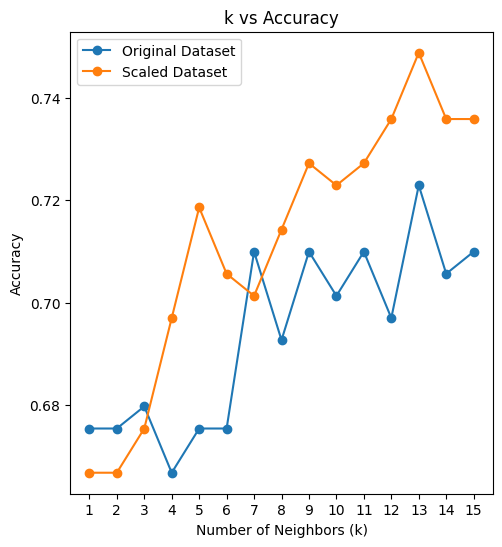

In [55]:
# Plot accuracy vs. k
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Dataset', marker='o')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset', marker='o')
plt.title('k vs Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()

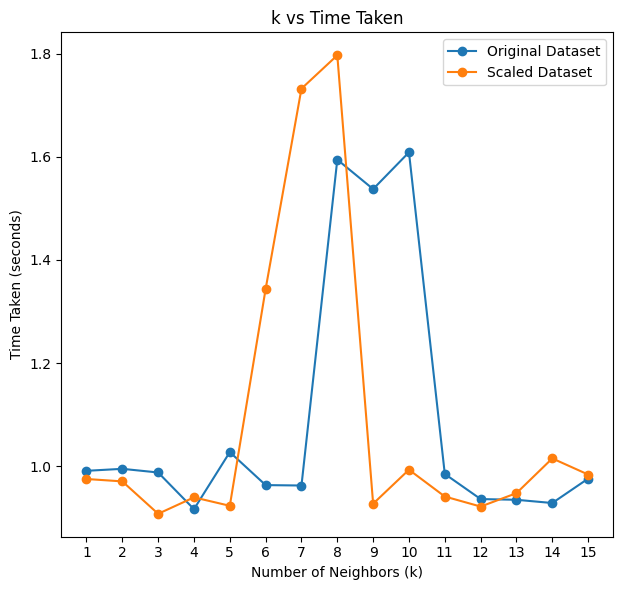

In [56]:
# Plot time taken vs. k
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(k_values, time_taken_original, label='Original Dataset', marker='o')
plt.plot(k_values, time_taken_scaled, label='Scaled Dataset', marker='o')
plt.title('k vs Time Taken')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.xticks(k_values)
plt.legend()

plt.tight_layout()
plt.show()

#3. Analyze and Discuss:
**• Discuss how the choice of k affects the accuracy and computational cost.**

The choice of k in the KNN algorithm is very important, both for the accuracy of the model and for its computational efficiency. A low value of k, such as 1, can result in high sensitivity to noise in the training data and may cause overfitting; this means the model performs well on the training data but has a poor performance on the unseen data since it relies on the probably misleading decision of single neighbors. Conversely, as k increases, the model becomes generalized; such a model will probably work better on new data since the noise gets averaged out. However, if k is set too high, it may lead to underfitting, where important patterns in the data are ignored, causing a decline in accuracy. From a computational perspective, although the number of distance calculations remains constant for each prediction independent of the value of nk, the increase in nk can slow down the process of prediction because more neighbors need to be considered for the majority vote. Therefore, choosing an appropriate k requires balancing these factors to achieve optimal model performance.

**Identify the optimal k based on your analysis**

Finding the optimum value of k includes looking into how accuracy changes with different values of k, along with considering computational efficiency. This is usually done by plotting accuracy against a range of k values and observing where the accuracy peaks. The optimum k is often found at this peak point; for example, if the highest value of accuracy falls at k=7 with an accuracy of 0.81 before declining at higher values, then k=7 would be considered optimal. However, another important factor is how changes in k affect the time it takes to make predictions; if increasing k gives similar accuracy but increases computation time significantly, a lower value may be more appropriate for practical use. Thus, the best value for k strikes a balance between maximization of predictive accuracy and reduction of computational costs to facilitate the deployment of the model efficiently in real-world scenarios.

#Problem - 4 - Additional Questions {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.

• Suggest strategies to improve the efficiency of KNN (e.g., approximate nearest neighbors, dimensionality
reduction).


#Challenges of Using KNN on Large Datasets and High-Dimensional Data:

**Computational Efficiency:**

KNN requires calculating the distance between the query point and all training points for every prediction. This can be computationally expensive, especially with large datasets, leading to long prediction times and increased memory usage.

**Curse of Dimensionality:**
In high-dimensional spaces, data points become sparse, and distance metrics become less meaningful. This may lead to a drop in accuracy as KNN fails to find meaningful neighbors, leading to overfitting or underfitting.

**Storage Requirements:**
Storing all training data can be impractical for large datasets, especially when the dataset is not only large in size but also high in dimensionality.

#Strategies to Improve the Efficiency of KNN:

**Approximate Nearest Neighbors (ANN):**

Implementation of ANN algorithms provides faster responses to queries by compromising on some accuracy. In the lower dimensions also, the neighbor's search can be effectively done by techniques such as KD-trees or Ball trees.

**Dimensionality Reduction:**
This can be done by methods such as PCA or t-SNE, which reduces the dimensions while retaining vital data structures. It not only accelerates the computation of distances but also alleviates the problem caused by the curse of dimensionality.

**Feature Selection:**
Eliminating irrelevant and redundant features using feature selection techniques could help in making the dataset simpler before applying the KNN and, therefore, enhancing both the accuracy and computational efficiency of the model.

**Data Sampling:**
You might want to use a representative sample for the very big datasets in training and testing. This would keep up performance while reducing the computation time.